Добавлена возможность ввода цифры для распознавания мышью. 

Начальная программа разбита на две ячейки, увеличено число эпох до 150

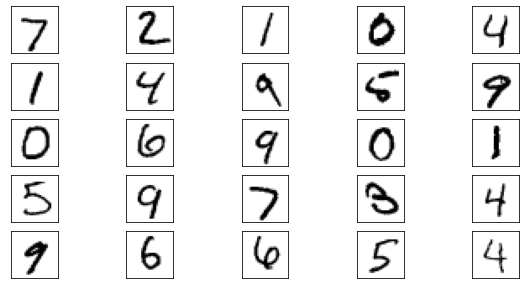

In [13]:
# распознавание цифр
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.layers import Dense

(x_train, y_train), (x_test, y_test) = mnist.load_data()  # загрузка выборки
# далее отображение первых 25 изображений из обучающей выборки - можно убрать
plt.figure(figsize=(10,5))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[i], cmap=plt.cm.binary)
 
plt.show()
# это самое главное, это сеть. здесь можно менять
model = keras.Sequential([
    keras.layers.Flatten (input_shape=(28, 28, 1)), # потому что размер изображения 28*28
    Dense(100, activation='relu'),
    Dense(10, activation='softmax')])
# print(model.summary())     # вывод структуры НС в консоль


x_train = x_train / 255 # нормализация
x_test = x_test / 255

y_train_cat = keras.utils.to_categorical(y_train, 10) # приведение к вектору из 0 и 1 (10 - размерность)
y_test_cat = keras.utils.to_categorical(y_test, 10)

model.compile(optimizer='adam',
loss='categorical_crossentropy',
metrics=['accuracy'])




In [15]:
model.fit(x_train, y_train_cat, batch_size=32, epochs=50, validation_split=0.3,  verbose=1, shuffle = True) #обучение

model.evaluate(x_test, y_test_cat,verbose=1 )

Epoch 1/50
1219/1219 [==============================] - 1s 995us/step - loss: 0.0032 - accuracy: 0.9994 - val_loss: 0.1468 - val_accuracy: 0.9747
Epoch 2/50
1219/1219 [==============================] - 1s 975us/step - loss: 0.0022 - accuracy: 0.9995 - val_loss: 0.1572 - val_accuracy: 0.9738
Epoch 3/50
1219/1219 [==============================] - 1s 978us/step - loss: 0.0076 - accuracy: 0.9979 - val_loss: 0.1736 - val_accuracy: 0.9722
Epoch 4/50
1219/1219 [==============================] - 1s 970us/step - loss: 0.0019 - accuracy: 0.9995 - val_loss: 0.1481 - val_accuracy: 0.9751
Epoch 5/50
1219/1219 [==============================] - 1s 988us/step - loss: 5.6873e-04 - accuracy: 0.9999 - val_loss: 0.1496 - val_accuracy: 0.9756
Epoch 6/50
1219/1219 [==============================] - 1s 973us/step - loss: 1.6718e-04 - accuracy: 1.0000 - val_loss: 0.1480 - val_accuracy: 0.9763
Epoch 7/50
1219/1219 [==============================] - 1s 987us/step - loss: 1.1658e-04 - accuracy: 1.0000 - val_lo

[0.18199492990970612, 0.9785000085830688]

In [9]:
from tkinter import *
from PIL import ImageGrab, Image, ImageOps
 
class Paint(Frame):
    def __init__(self, parent):
        Frame.__init__(self, parent)
        self.setUI()
        self.brush_size = 6
        self.brush_color = "black"
        self.parent = parent
        

    
    def setUI(self):
        self.pack(fill=BOTH)
        self.canv = Canvas(self, width=280, height=280, bg="white")
        self.canv.pack()
        
        self.savepic=Button(self, text='SAVE', command = self.getter)
        self.savepic.pack()
        
        self.canv.bind("<B1-Motion>", self.draw)
        
    def draw(self, event):
        self.canv.create_oval(event.x - self.brush_size,
                          event.y - self.brush_size,
                          event.x + self.brush_size,
                          event.y + self.brush_size,
                          fill=self.brush_color, outline=self.brush_color)

    def getter(self):        
        x0 = self.canv.winfo_rootx()
        y0 = self.canv.winfo_rooty()
        w = self.canv.winfo_width()
        h = self.canv.winfo_height()
        x1 = x0 + w 
        y1 = y0 + h
        
        im = ImageGrab.grab(bbox = (x0 * 1.25, y0 * 1.25, x1 * 1.25, y1 * 1.25))
        # коэффициент 1.25 связан с масштабированием Windows, конкретно у меня это 125%, если не так, надо изменить
        im.save('tmp.png')
        
        bw_img = Image.open('tmp.png').convert('L')
        bw_img.save('bw.png')
        width = 28
        height = 28
        resized_img = bw_img.resize((width, height), Image.ANTIALIAS)
        resized_img = ImageOps.invert(resized_img)
        resized_img.save('tmp.png')


Ввести изображение или выбрать из тестовых? 1 - рисование, 0 - выбор


 1


[[1.4803171e-16 1.2539975e-04 6.8080262e-06 8.7425625e-03 3.3021466e-09
  1.2012116e-13 3.5604011e-16 9.9109358e-01 2.9601039e-09 3.1683350e-05]]   - такая цифра должна быть на рисунке. Верно?

ответ -  7


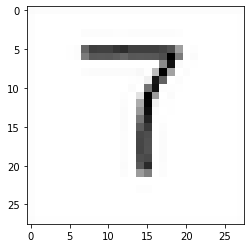

In [18]:
print('Ввести изображение или выбрать из тестовых? 1 - рисование, 0 - выбор')

ch = int(input())
assert 0<= ch <= 1, 'Неправильный ввод' 

if ch == 0:
    print("Введите номер изображения из тестовой выборки - ")
    n = int(input()) # изображение
    x = np.expand_dims(x_test[n], axis=0)
    # вывдем рукописную цифру с заданным номером, полученное сетью значение - в виде числа и в виде вектора
    res = model.predict(x)
    print( res, '  - такая цифра должна быть на рисунке. Верно?')
    print()
    print('ответ - ', np.argmax(res) )
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

else:
    root = Tk()
    root.geometry("300x350")
    app = Paint(root)
    root.mainloop()
    
    pic = Image.open("tmp.png")
    pix = np.asarray(pic, dtype = int) / 255
    x = np.expand_dims(pix, axis = 0)
    res = model.predict(x)
    print( res, '  - такая цифра должна быть на рисунке. Верно?')
    print()
    print('ответ - ', np.argmax(res) )
    plt.imshow(pix, cmap=plt.cm.binary)
    plt.show()